In [14]:
# Importation des bibliothèques
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv('extrait_data.csv')

# Afficher les premières lignes
data.head()

,parental level of education,lunch,test preparation course
0,bachelor's degree,standard,none
1,some college,standard,completed
2,master's degree,standard,none
3,associate's degree,free/reduced,none
4,some college,standard,none


In [15]:
 # Exploration des Données
# Vérifier les informations générales
data.info()

# Vérifier les valeurs manquantes
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental level of education  1000 non-null   object
 1   lunch                        1000 non-null   object
 2   test preparation course      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


parental level of education    0
lunch                          0
test preparation course        0
dtype: int64

In [16]:
# Sélectionner des colonnes spécifiques
selected_columns = data[['parental level of education', 'lunch', 'test preparation course']]

# Filtrer les données
filtered_data = data[data['lunch'] == 'free/reduced']

# Créer une nouvelle colonne
data['completed'] = data['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

# Trier les données par niveau d'éducation
sorted_data = data.sort_values(by='parental level of education')

In [19]:
# Calculer des statistiques descriptives
statistics = data.describe()
statistics


,completed
count,1000.000000
mean,0.358000
std,0.479652
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [20]:
# Grouper les données et appliquer des agrégations
grouped_data = data.groupby('parental level of education')['completed'].mean()
grouped_data

parental level of education
associate's degree    0.369369
bachelor's degree     0.389831
high school           0.285714
master's degree       0.338983
some college          0.340708
some high school      0.430168
Name: completed, dtype: float64

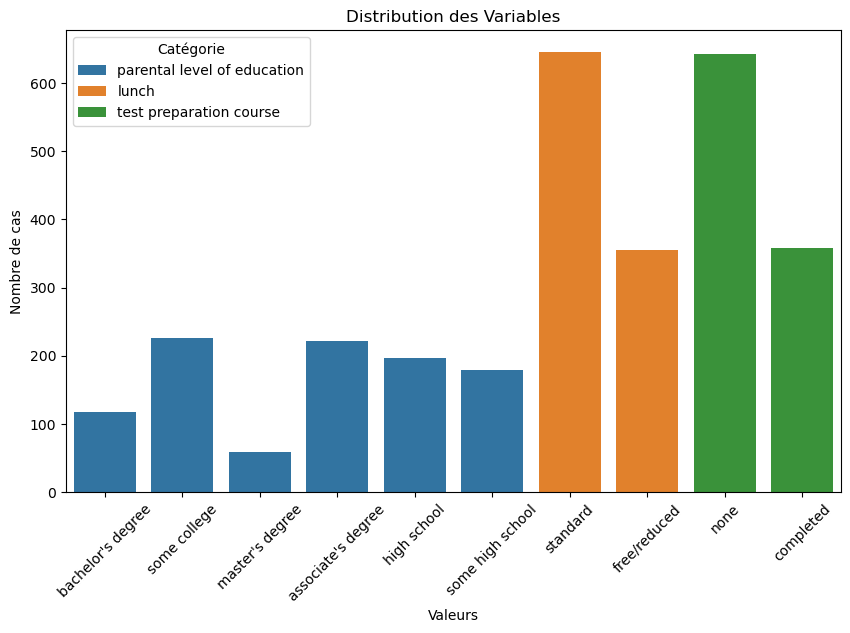

In [22]:
# Importation de Matplotlib et Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la taille de la figure
plt.figure(figsize=(10, 6))

# Création d'un DataFrame pour le graphique
melted_data = data.melt(value_vars=['parental level of education', 'lunch', 'test preparation course'], 
                         var_name='Category', value_name='Value')

# Histogramme combiné
sns.countplot(data=melted_data, x='Value', hue='Category')
plt.title('Distribution des Variables')
plt.xlabel('Valeurs')
plt.ylabel('Nombre de cas')
plt.legend(title='Catégorie')
plt.xticks(rotation=45)
plt.show()

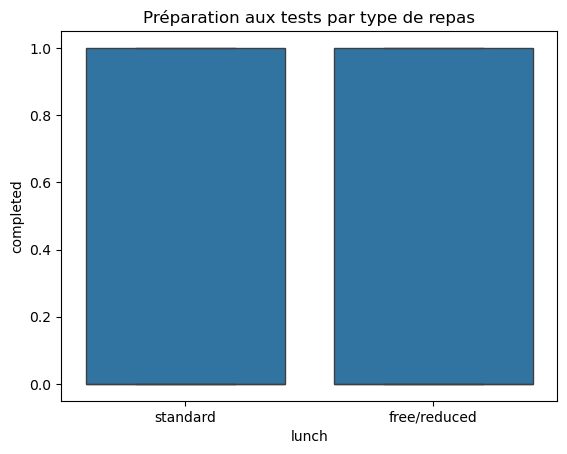

In [23]:
# Boxplot des résultats de préparation aux tests selon le type de repas
sns.boxplot(x='lunch', y='completed', data=data)
plt.title('Préparation aux tests par type de repas')
plt.show()